# EXO3

## On a crée un petit jeu de données simulé représentant, par exemple, la relation entre la température et la consommation d’énergie.
## 1.Import and creation of data

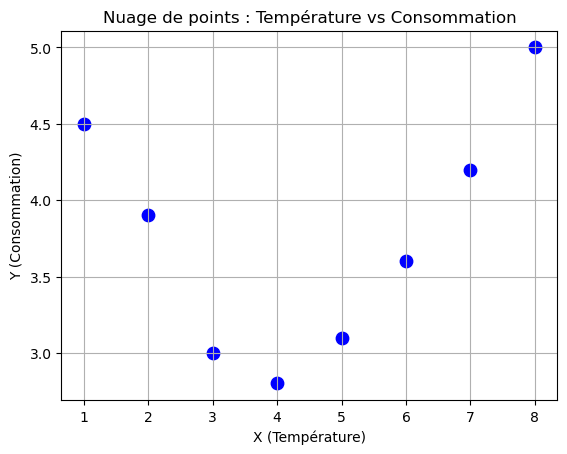

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Données : température (X) et consommation (Y)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
Y = np.array([4.5, 3.9, 3.0, 2.8, 3.1, 3.6, 4.2, 5.0], dtype=float)

plt.scatter(X, Y, color='blue', s=80)
plt.title("Nuage de points : Température vs Consommation")
plt.xlabel("X (Température)")
plt.ylabel("Y (Consommation)")
plt.grid(True)
plt.show()


## 2.Construction du modèle polynomial

In [3]:
# Construction de la matrice du modèle polynomial
X_poly = np.column_stack((np.ones(len(X)), X, X**2))

print("Matrice X_poly :\n", X_poly)


Matrice X_poly :
 [[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]
 [ 1.  7. 49.]
 [ 1.  8. 64.]]


## 3.Calcul des coefficients β₀, β₁, β₂

In [4]:
# Calcul des coefficients par moindres carrés
beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ Y

beta0, beta1, beta2 = beta
print(f"β₀ = {beta0:.4f}")
print(f"β₁ = {beta1:.4f}")
print(f"β₂ = {beta2:.4f}")


β₀ = 5.6411
β₁ = -1.2708
β₂ = 0.1506


## 4.Prédictions et tracé de la courbe

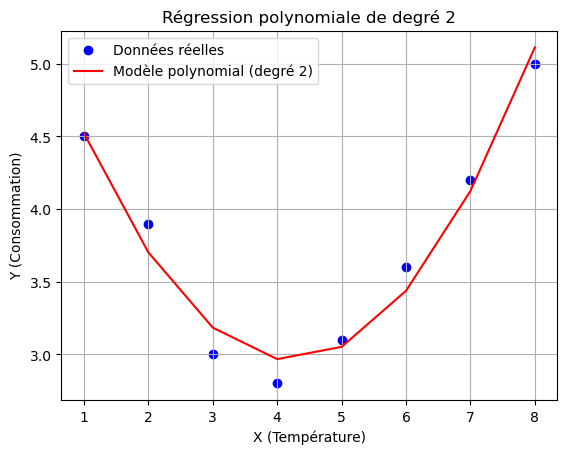

In [5]:
# Prédictions
Y_pred = beta0 + beta1*X + beta2*(X**2)

# Tracé
plt.scatter(X, Y, color='blue', label='Données réelles')
plt.plot(X, Y_pred, color='red', label='Modèle polynomial (degré 2)')
plt.title("Régression polynomiale de degré 2")
plt.xlabel("X (Température)")
plt.ylabel("Y (Consommation)")
plt.legend()
plt.grid(True)
plt.show()


## 5.Calcul du coefficient de détermination R²

In [7]:
RSS = np.sum((Y - Y_pred)**2)
TSS = np.sum((Y - np.mean(Y))**2)
R2 = 1 - (RSS / TSS)

print(f"RSS = {RSS:.4f}")
print(f"TSS = {TSS:.4f}")
print(f"R²  = {R2:.4f}")


RSS = 0.1486
TSS = 4.2588
R²  = 0.9651


## 6.Résumé du modèle

In [8]:
print(f"Équation du modèle : Y = {beta0:.4f} + {beta1:.4f}X + {beta2:.4f}X²")


Équation du modèle : Y = 5.6411 + -1.2708X + 0.1506X²
